In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [100]:
data = pd.read_csv('Company_Data.csv')

In [101]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [102]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [104]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [105]:
data['Sales'].isna().sum()

0

In [106]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [107]:
data.head(176)

#sales value of 174th row is 0 ,lets drop that row

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
171,12.49,93,106,12,416,55,Medium,75,15,Yes,Yes
172,9.03,104,102,13,123,110,Good,35,16,Yes,Yes
173,6.38,135,91,5,207,128,Medium,66,18,Yes,Yes
174,0.00,139,24,0,358,185,Medium,79,15,No,No


In [108]:
data =data.drop(index=174).reset_index(drop=True)


# Encoding the categoricals variables

In [109]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['ShelveLoc'] = LE.fit_transform(data['ShelveLoc'])
data['Urban'] = LE.fit_transform(data['Urban'])
data['US'] = LE.fit_transform(data['US'])

In [110]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [111]:
data.Sales.mean(),data.Sales.max()


(7.515112781954888, 16.27)

<Axes: xlabel='Sales', ylabel='Count'>

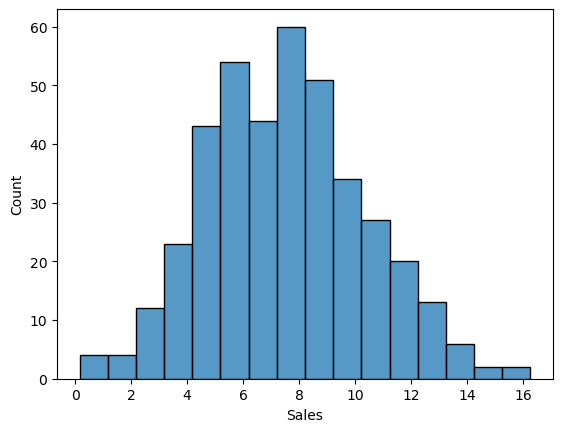

In [112]:
sns.histplot(data.Sales)


# Converting Sales column into the categories for the better prediction

In [113]:
bins = [0,5.39,9.32,17]
labels = ['Low',"Mid",'High']
sales_ctg = pd.cut(data['Sales'],bins=bins,labels=labels)
sales_ctg = pd.DataFrame(sales_ctg)
data1 = pd.DataFrame(data.drop(columns='Sales'))
data1['Sales_Cat'] = sales_ctg
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Mid
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
394,138,108,17,203,128,1,33,14,1,1,High
395,139,23,3,37,120,2,55,11,0,1,Mid
396,162,26,12,368,159,2,40,18,1,1,Mid
397,100,79,7,284,95,0,50,12,1,1,Mid


In [114]:
data1[data1['Sales_Cat'].isnull()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat


In [188]:
data1.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
CompPrice,1.000000,-0.077315,-0.021957,-0.096309,0.585053,0.021482,-0.104320,0.024263,0.070427,0.020029,0.037347
Income,-0.077315,1.000000,0.055241,-0.005362,-0.045616,-0.064609,0.001695,-0.055362,0.031975,0.084668,-0.090266
Advertising,-0.021957,0.055241,1.000000,0.267706,0.052495,0.010649,-0.000587,-0.032590,0.038327,0.683497,-0.164157
Population,-0.096309,-0.005362,0.267706,1.000000,-0.016978,-0.046155,-0.045347,-0.107122,-0.049747,0.062877,-0.041477
Price,0.585053,-0.045616,0.052495,-0.016978,1.000000,0.008631,-0.115424,0.008760,0.059169,0.068644,0.216531
ShelveLoc,0.021482,-0.064609,0.010649,-0.046155,0.008631,1.000000,0.053395,0.000616,-0.060990,-0.037066,0.093757
Age,-0.104320,0.001695,-0.000587,-0.045347,-0.115424,0.053395,1.000000,0.004833,0.034842,0.014090,0.080479
Education,0.024263,-0.055362,-0.032590,-0.107122,0.008760,0.000616,0.004833,1.000000,-0.031567,-0.077023,0.055973
Urban,0.070427,0.031975,0.038327,-0.049747,0.059169,-0.060990,0.034842,-0.031567,1.000000,0.042084,0.006045
US,0.020029,0.084668,0.683497,0.062877,0.068644,-0.037066,0.014090,-0.077023,0.042084,1.000000,-0.164237


<Axes: >

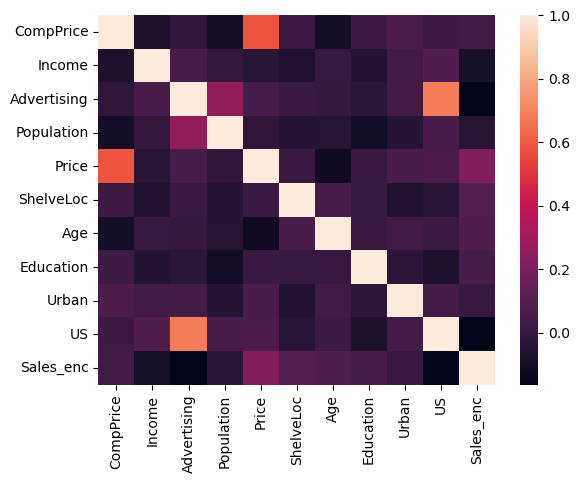

In [191]:
sns.heatmap(data1.corr())

# Encoding the Sales column

In [115]:
data2 = pd.DataFrame(data1)
data2['Sales_enc'] = LE.fit_transform(data1.Sales_Cat)
data2.drop('Sales_Cat',axis=1,inplace=True)
data2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
394,138,108,17,203,128,1,33,14,1,1,0
395,139,23,3,37,120,2,55,11,0,1,2
396,162,26,12,368,159,2,40,18,1,1,2
397,100,79,7,284,95,0,50,12,1,1,2


In [116]:
X = data2.iloc[:,:-1]

In [117]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
394,138,108,17,203,128,1,33,14,1,1
395,139,23,3,37,120,2,55,11,0,1
396,162,26,12,368,159,2,40,18,1,1
397,100,79,7,284,95,0,50,12,1,1


In [118]:
Y = data2['Sales_enc']

In [119]:
Y

0      0
1      0
2      0
3      2
4      1
      ..
394    0
395    2
396    2
397    2
398    0
Name: Sales_enc, Length: 399, dtype: int32

# Train test split

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((319, 10), (80, 10), (319,), (80,))

# Decision Tree classifier using Entropy Criterion

In [170]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [172]:
model= dt.fit(X_train,y_train)

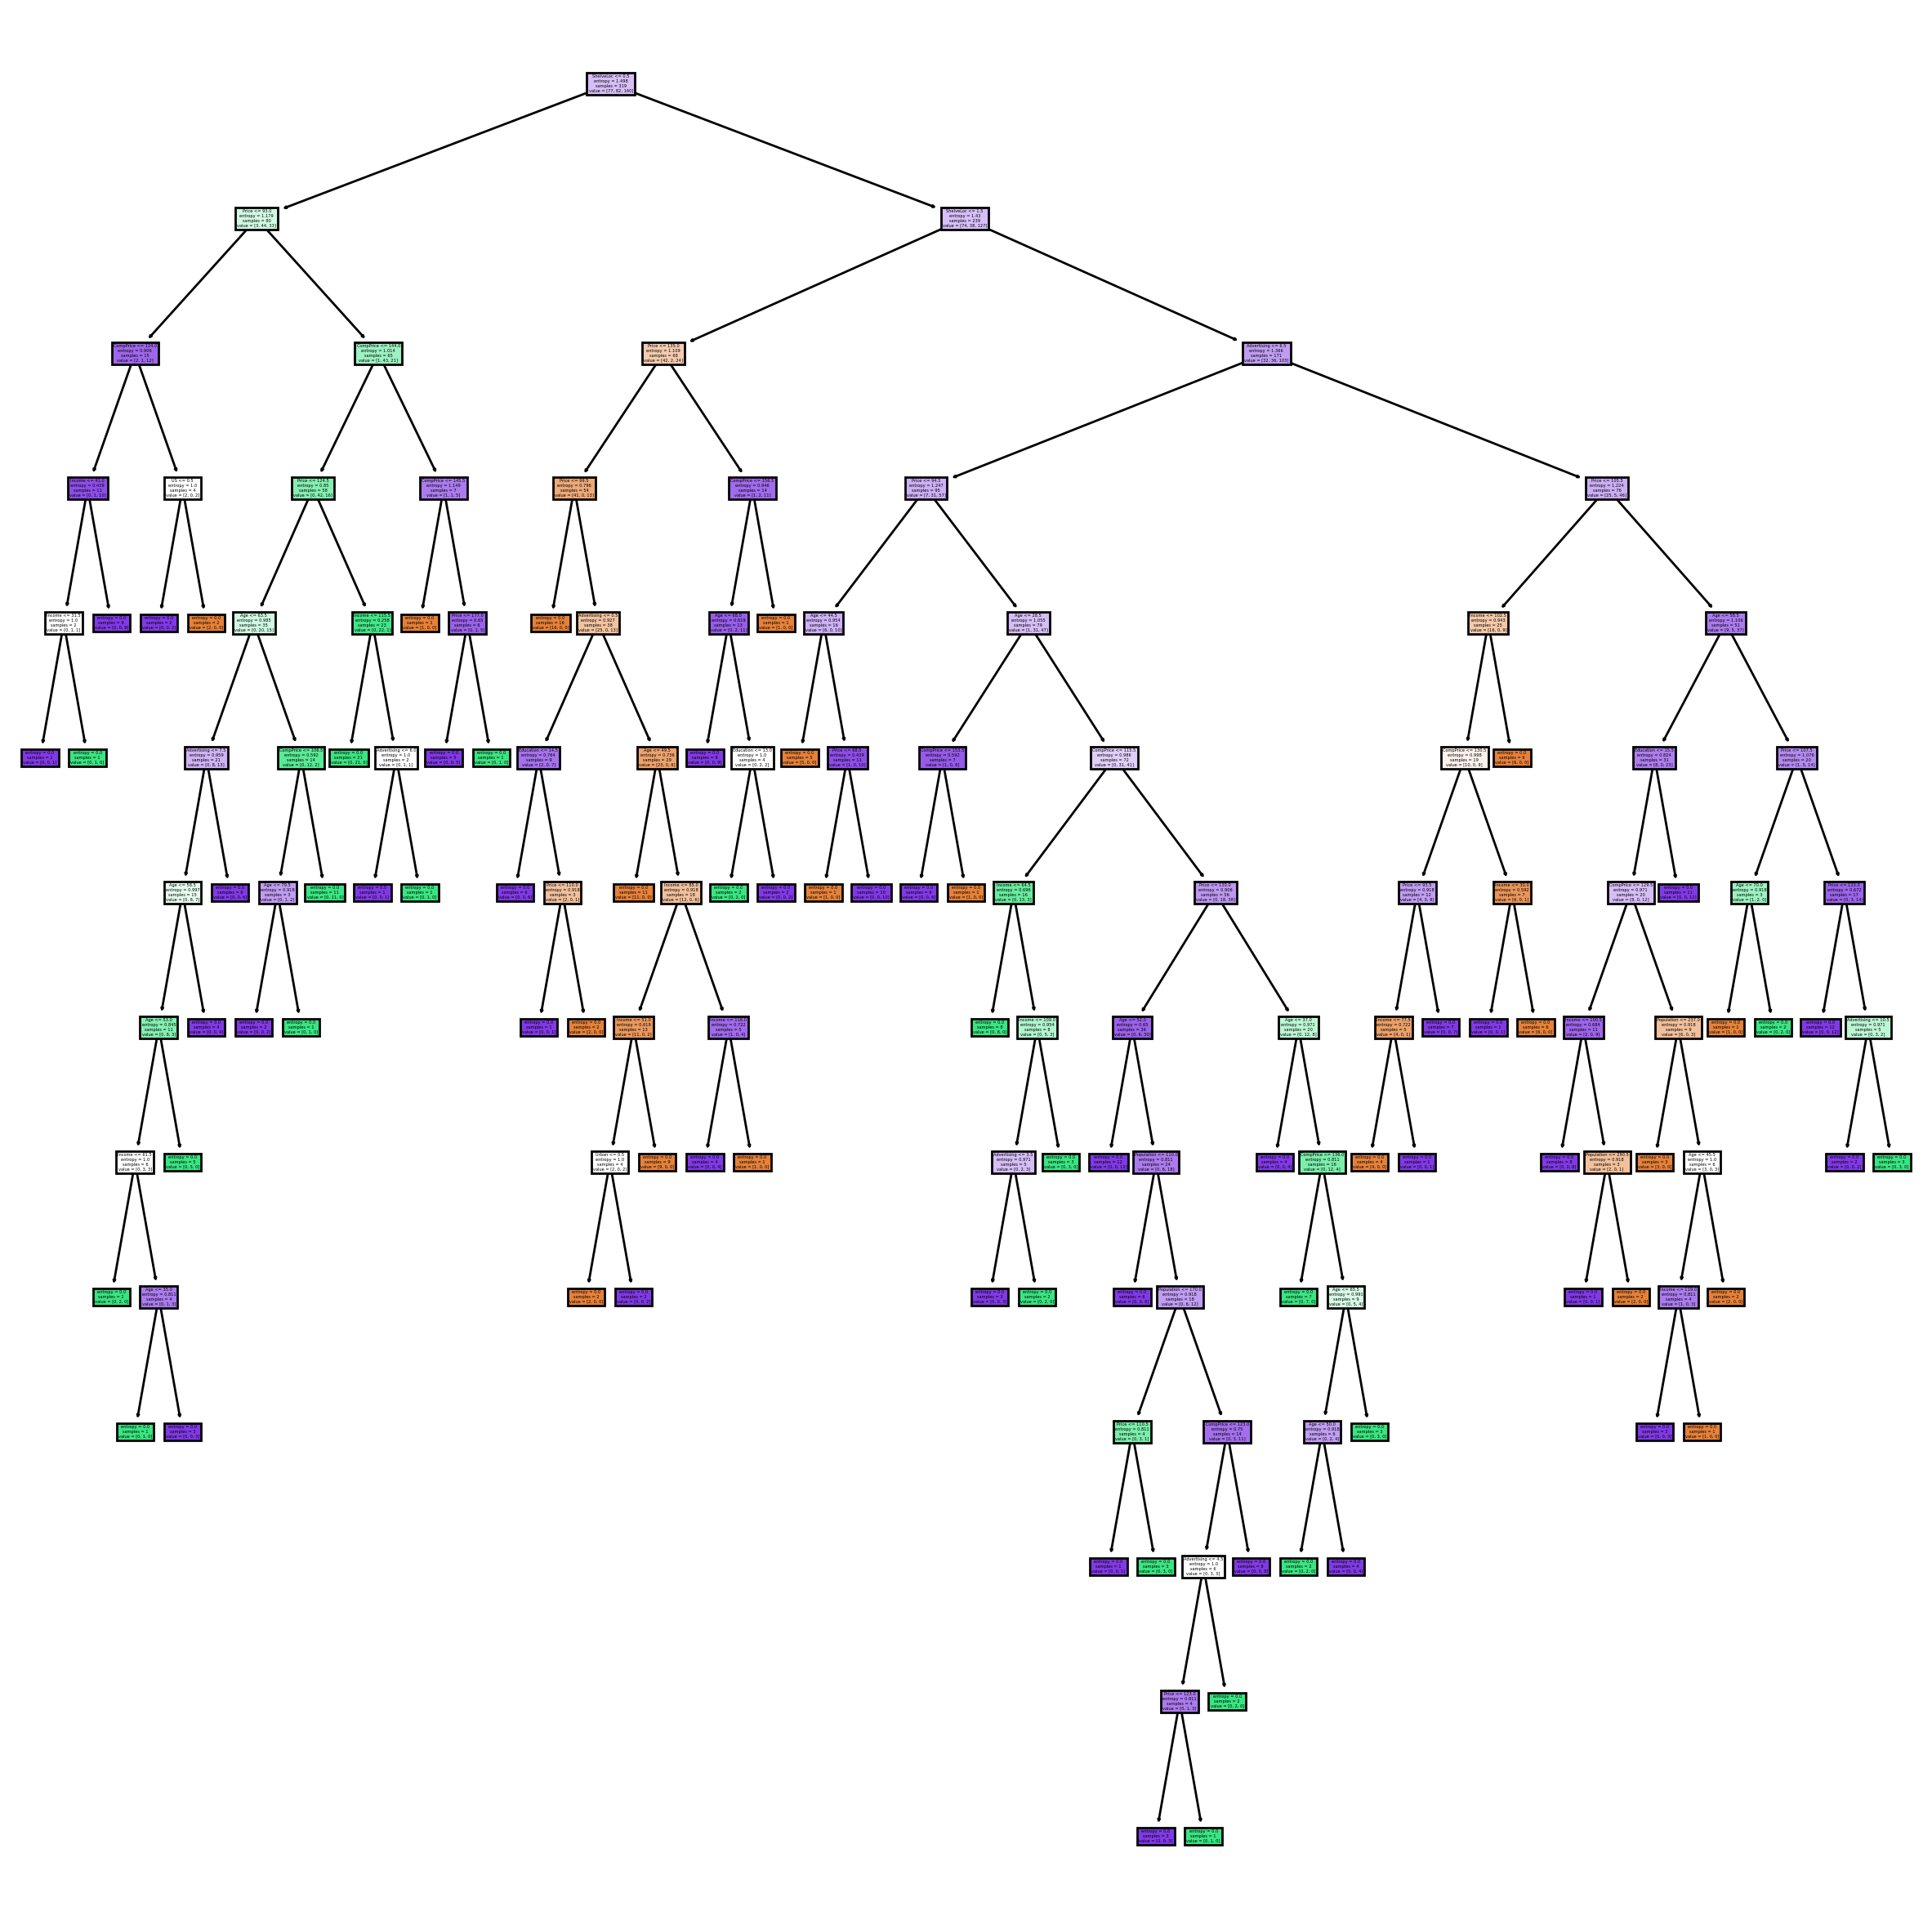

In [173]:
plt.figure(figsize=(15,15),dpi=200);
plot_tree(model,feature_names=X.columns,filled=True);

In [174]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [175]:
train_pred

array([2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1,
       0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0,

In [176]:
from sklearn.metrics import accuracy_score


In [177]:
accuracy_score(y_train,train_pred)
#Got 100% accuracy score on training data as no max depth given 

1.0

In [178]:
accuracy_score(y_test,test_pred)
#Accuracy score on test data is 66%

0.6625

# Decision Tree classifier using Gini Criterion

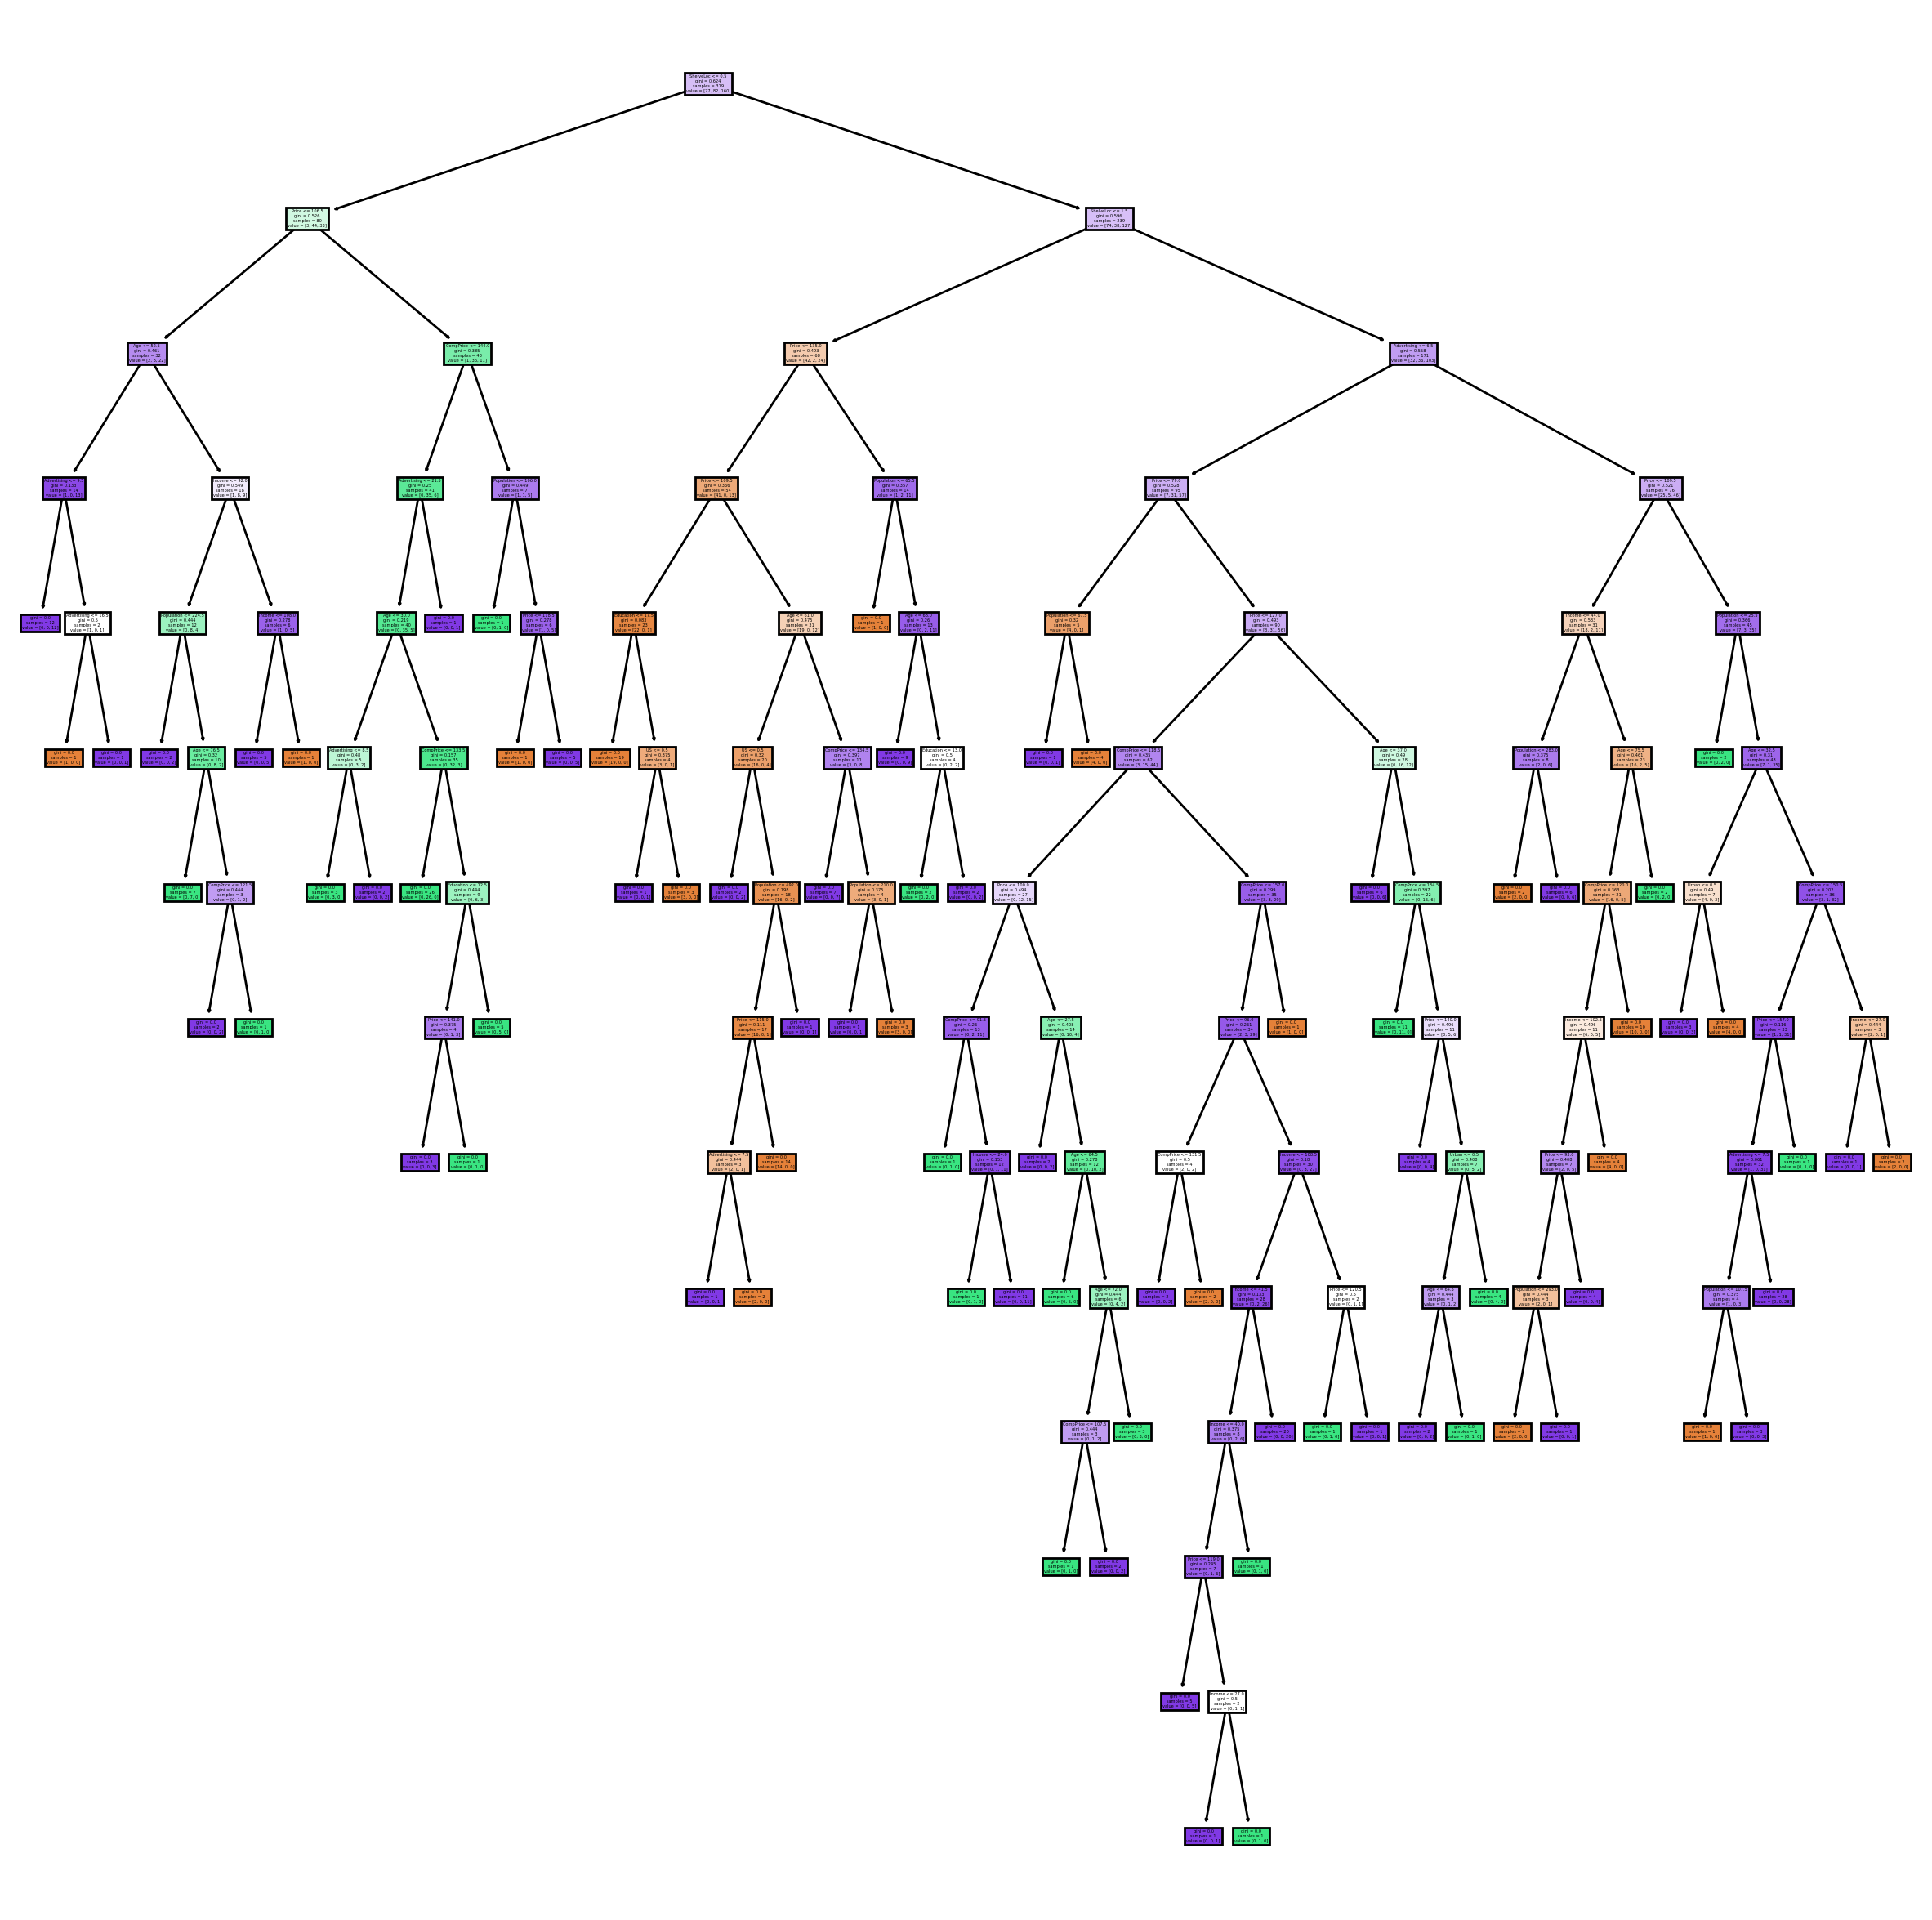

In [179]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model1 = DecisionTreeClassifier(criterion='gini',random_state=42)

model1.fit(X_train,y_train)

plt.figure(figsize=(15,15),dpi=200);
plot_tree(model1,feature_names=X.columns,filled=True);

In [162]:
train_pred1 = model1.predict(X_train)
test_pred1 = model1.predict(X_test)

In [180]:
accuracy_score(y_train,train_pred1)
#Got 100% accuracy score on training data as no max depth given 



1.0

In [181]:
accuracy_score(y_test,test_pred1)
#Accuracy score on test data 

0.6375

In [182]:
test_data=pd.DataFrame({'CompPrice':115,'Income':50,'Advertising':5,'Population':290,'Price':105,'ShelveLoc':2,'Age':51,'Education':14,'Urban':0,'US':1},index=[1])
test_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,115,50,5,290,105,2,51,14,0,1


In [183]:
model1.predict(test_data)

array([1])

In [184]:
data1['Sales_Cat'].value_counts()


Mid     201
Low      99
High     99
Name: Sales_Cat, dtype: int64

In [185]:
data1['Sales_enc'].value_counts()

2    201
0     99
1     99
Name: Sales_enc, dtype: int64

# It says the test data is 'High' sales